In [2]:
import matplotlib.pyplot as plt
import plotly
plotly.tools.set_credentials_file(username='s5shah', api_key='RC9QWik0C65P4CRJUVRT')
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
from gundata import gundata
import pandas as pd
from collections import Counter
import operator
import collections

In [3]:
years = ['2014', '2015', '2016', '2017', '2018']
Mass_Shootings = list()
for i in years:
    Mass_Shootings.append(gundata(pd.read_csv(f"DataSet/Mass_Shootings_{i}.csv"), 'Mass_Shootings'))
    
School_Shootings = list()
for i in years:
    School_Shootings.append(gundata(pd.read_csv(f"DataSet/School_Shootings_{i}.csv"), 'School_Shootings'))
    
Officers_Shootings = list()
for i in years:
    Officers_Shootings.append(gundata(pd.read_csv(f"DataSet/Officers_Shootings_{i}.csv"), 'Officers_Shootings'))

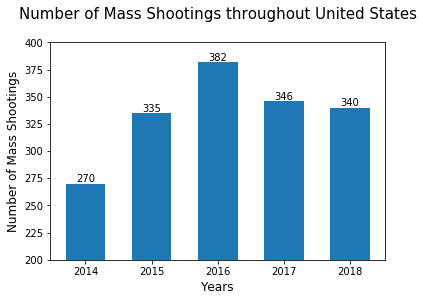

In [4]:
no_incidents_ms = list()
for i in range(len(Mass_Shootings)):
    no_incidents_ms.append(Mass_Shootings[i].get_total_incidents())

plt.bar(years, no_incidents_ms, label = "Number of Mass Shootings throughout United States", width = 0.6)
labels = list()
for i in range(len(Mass_Shootings)):
    labels.append(str(no_incidents_ms[i]))
for i in range(len(Mass_Shootings)):
    plt.text(x = years[i] , y = no_incidents_ms[i]+1.5, s = labels[i], size = 10, horizontalalignment='center')

plt.ylim(200, 400)
plt.xlabel("Years", fontsize = 12)
plt.ylabel("Number of Mass Shootings", fontsize = 12)
plt.title("Number of Mass Shootings throughout United States\n", fontsize = 15)
plt.show()

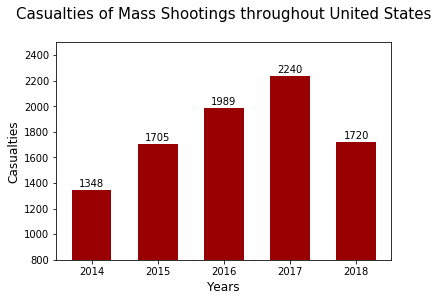

In [5]:
no_casualties_ms = list()
for i in range(len(Mass_Shootings)):
    no_casualties_ms.append(Mass_Shootings[i].count_casualties())

plt.bar(years, no_casualties_ms, label = "Casualties of Mass Shootings throughout United States", width = 0.6, color = 'xkcd:blood red')
labels = list()
for i in range(len(Mass_Shootings)):
    labels.append(str(no_casualties_ms[i]))
for i in range(len(Mass_Shootings)):
    plt.text(x = years[i] , y = no_casualties_ms[i] + 25, s = labels[i], size = 10, horizontalalignment='center')

plt.ylim(800, 2500)
plt.xlabel("Years", fontsize = 12)
plt.ylabel("Casualties", fontsize = 12)
plt.title("Casualties of Mass Shootings throughout United States\n", fontsize = 15)
plt.show()

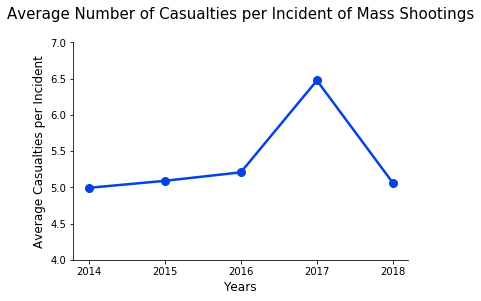

In [6]:
casualties_incidents_ratio_ms = list()
for i in range(len(no_casualties_ms)):
    casualties_incidents_ratio_ms.append(no_casualties_ms[i] / no_incidents_ms[i])

plt.plot(years, casualties_incidents_ratio_ms, label = "Average number of casualties per incident of Mass Shootings", marker = "o", markersize = 8, color = 'xkcd:blue', linewidth = 2.5)
plt.ylim(4,7)
plt.xlabel("Years", fontsize = 12)
plt.ylabel("Average Casualties per Incident", fontsize = 12)
plt.title("Average Number of Casualties per Incident of Mass Shootings\n", fontsize = 15)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

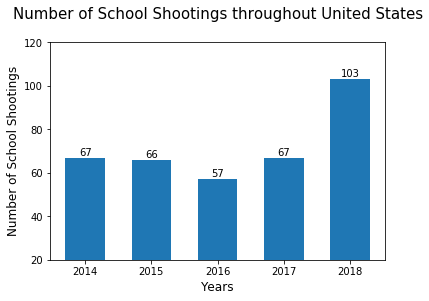

In [7]:
no_incidents_ss = list()
for i in range(len(School_Shootings)):
    no_incidents_ss.append(School_Shootings[i].get_total_incidents())

plt.bar(years, no_incidents_ss, label = "Number of School Shootings throughout United States", width = 0.6)
labels = list()
for i in range(len(School_Shootings)):
    labels.append(str(no_incidents_ss[i]))
for i in range(len(School_Shootings)):
    plt.text(x = years[i] , y = no_incidents_ss[i] + 1, s = labels[i], size = 10, horizontalalignment='center')
    
plt.ylim(20, 120)
plt.xlabel("Years", fontsize = 12)
plt.ylabel("Number of School Shootings", fontsize = 12)
plt.title("Number of School Shootings throughout United States\n", fontsize = 15)
plt.show()

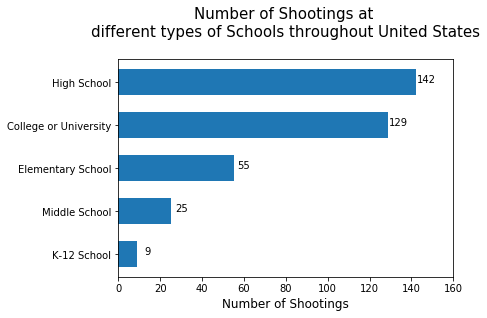

In [8]:
list_of_dicts = list()
for i in range(len(School_Shootings)):
    list_of_dicts.append(School_Shootings[i].count_by_columns("School Type"))
temp = Counter()
for i in range(len(list_of_dicts)):
    temp += Counter(list_of_dicts[i])
final_counts = dict(temp)
sorted_count = sorted(final_counts.items(), key=operator.itemgetter(1))
sorted_final_counts = collections.OrderedDict(sorted_count)
plt.barh(list(sorted_final_counts.keys()), list(sorted_final_counts.values()), height = 0.6)
labels = list()
list_counts = list(sorted_final_counts.values())
list_types = list(sorted_final_counts.keys())
for i in range(len(list_counts)):
    labels.append(str(list_counts[i]))
for i in range(len(list_counts)):
    plt.text(x = list_counts[i]+5 , y = list_types[i], s = labels[i], size = 10, horizontalalignment='center')
    
plt.xlim(0,160)
plt.xlabel("Number of Shootings", fontsize = 12)
plt.title("Number of Shootings at \ndifferent types of Schools throughout United States\n", fontsize = 15)
plt.show()

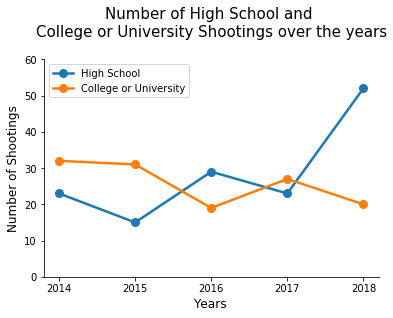

In [9]:
hs_killings = list()
cu_killings = list()
for i in range(len(list_of_dicts)):
    hs_killings.append(list_of_dicts[i]['High School'])
    cu_killings.append(list_of_dicts[i]['College or University'])

plt.plot(years, hs_killings, cu_killings, label = "Number of High School and College or University Shootings over the years", marker = "o", markersize = 8, linewidth = 2.5)
plt.ylim(0,60)
plt.xlabel("Years", fontsize = 12)
plt.ylabel("Number of Shootings", fontsize = 12)
plt.title("Number of High School and \nCollege or University Shootings over the years\n", fontsize = 15)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.legend(['High School', 'College or University'], loc = 'best')
plt.show()

In [10]:
data = list()
domain = [
    {
        'x': [0, 0.3],
        'y': [0.6, 1]
    },
    {
        'x': [0.333, 0.633],
        'y': [0.6, 1]
    },
    {
        'x': [0.666, 0.966],
        'y': [0.6, 1]
    },
    {
        'x': [0.1665, 0.4665],
        'y': [0.1, 0.5]
    },
    {
        'x': [0.4995, 0.7995],
        'y': [0.1, 0.5]
    }
]
os_list_dicts = list()
for i in range(len(Officers_Shootings)):
    os_list_dicts.append(Officers_Shootings[i].count_by_columns("State"))

for i in range(len(os_list_dicts)):
    temp = dict()
    temp_sorted = dict(sorted(os_list_dicts[i].items(), key = operator.itemgetter(1), reverse = True))
    total = sum(temp_sorted.values())
    to_plot = dict()
    for j in list(temp_sorted)[0:5]:
        to_plot[j] = temp_sorted[j]
    to_plot["Others"] = total - sum(to_plot.values())
    temp['labels'] = list(to_plot.keys())
    temp['values'] = list(to_plot.values())
    temp['type'] = 'pie'
    temp['hoverinfo'] = 'label+value'
    temp['direction'] = 'clockwise'
    temp['sort'] = False
    temp['domain'] = domain[i]
    temp['name'] = f"{years[i]}"
    data.append(temp)

layout = dict()
layout['title'] = {
        'font': {
            'size': 30
        },
        'text': "Distribution of Officer Shootings that occurred over time"
}

layout['showlegend'] = True
layout['height'] = 600
layout['width'] = 600
layout['autosize'] = False
layout['annotations'] = [
    {
        'font': {
            'size': 15
        },
        'showarrow': False,
        'text': '2014',
        'x': 0.125,
        'y': 0.575
    },
    {
        'font': {
            'size': 15
        },
        'showarrow': False,
        'text': '2015',
        'x': 0.483,
        'y': 0.575
    },
    {
        'font': {
            'size': 15
        },
        'showarrow': False,
        'text': '2016',
        'x': 0.846,
        'y': 0.575
    },
    {
        'font': {
            'size': 15
        },
        'showarrow': False,
        'text': '2017',
        'x': 0.29,
        'y': 0.05
    },
    {
        'font': {
            'size': 15
        },
        'showarrow': False,
        'text': '2018',
        'x': 0.6495,
        'y': 0.05
    }
]

fig = dict()
fig['data'] = data
fig['layout'] = layout

py.iplot(fig, filename='statewise_distribution')

C:\Users\Sneh\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



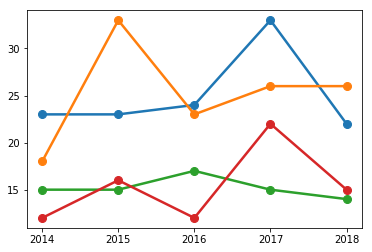

In [60]:
new_data = dict()
for i in ['California', 'Texas', 'Georgia', 'Florida']:
    new_data[i] = list()
for i in range(len(os_list_dicts)):
    for j in os_list_dicts[i]:
        if j in ['California', 'Texas', 'Georgia', 'Florida']:
            new_data[j].append(os_list_dicts[i][j])

new_data['Georgia']
plt.plot(years, new_data['California'], years, new_data['Texas'], years, new_data['Georgia'], years, new_data['Florida'], marker = "o", markersize = 8, linewidth = 2.5)
plt.show()